In [1]:
import os
os.environ["HADOOP_HOME"] = "/home/hadoop/hadoop2"
os.environ["SPARK_HOME"] = "/home/bhaven/spark-2.3.1-bin-hadoop2.7"
os.environ["JAVA_HOME"]="/usr/lib/jvm/java-1.8.0-openjdk-amd64"

In [2]:
!echo $HADOOP_HOME
!echo $SPARK_HOME
!echo $JAVA_HOME

/home/hadoop/hadoop2
/home/bhaven/spark-2.3.1-bin-hadoop2.7
/usr/lib/jvm/java-1.8.0-openjdk-amd64


In [3]:
import findspark
findspark.init()

In [4]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.getOrCreate()
spark

In [5]:
from pyspark.ml.clustering import KMeans
from pyspark.ml.evaluation import ClusteringEvaluator

# Loads data.
dataset = spark.read.format("libsvm").load("file:///home/bhaven/Downloads/sample_kmeans_data.txt")

# Trains a k-means model.
kmeans = KMeans().setK(2).setSeed(1)
model = kmeans.fit(dataset)

# Make predictions
predictions = model.transform(dataset)

# Evaluate clustering by computing Silhouette score
evaluator = ClusteringEvaluator()

silhouette = evaluator.evaluate(predictions)
print("Silhouette with squared euclidean distance = " + str(silhouette))

# Shows the result.
centers = model.clusterCenters()
print("Cluster Centers: ")
for center in centers:
    print(center)

Silhouette with squared euclidean distance = 0.9997530305375207
Cluster Centers: 
[0.1 0.1 0.1]
[9.1 9.1 9.1]


In [80]:
dataset.show()

+-----+--------------------+
|label|            features|
+-----+--------------------+
|  0.0|           (3,[],[])|
|  1.0|(3,[0,1,2],[0.1,0...|
|  2.0|(3,[0,1,2],[0.2,0...|
|  3.0|(3,[0,1,2],[9.0,9...|
|  4.0|(3,[0,1,2],[9.1,9...|
|  5.0|(3,[0,1,2],[9.2,9...|
+-----+--------------------+



In [81]:
import pandas as pd
df=dataset.toPandas()
l = []
for i in range (0,len(df["features"])):
    l.append(df["features"][i][0])
df

,label,features
0,0.0,"(0.0, 0.0, 0.0)"
1,1.0,"(0.1, 0.1, 0.1)"
2,2.0,"(0.2, 0.2, 0.2)"
3,3.0,"(9.0, 9.0, 9.0)"
4,4.0,"(9.1, 9.1, 9.1)"
5,5.0,"(9.2, 9.2, 9.2)"


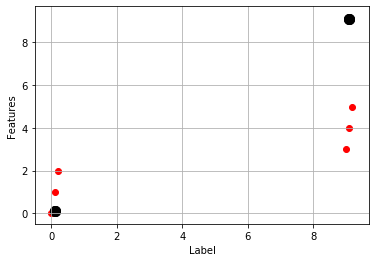

In [79]:
import matplotlib.pyplot as plt
plt.scatter(l,df['label'],c='red')
plt.scatter(centers,centers,c="black",s=100)
plt.grid()
plt.xlabel("Label")
plt.ylabel("Features")
plt.show()